# TO DO
(1) 자료 설명

# 자료 전처리

> 이용 자료
> * 암환자 수 추이 : 시도별_전체_중증_암_등록환자의_암유형별_등록인원_현황_20221117175501.csv  
> * 미세먼지 농도 : 미세먼지_PM10__월별_도시별_대기오염도_20221118165018.csv  
> * 미세먼지 농도 : 미세먼지_PM2.5__월별_도시별_대기오염도_20221118164805.csv  
> * 시군구별 인구 : 행정구역_시군구_별__성별_인구수_20221118171006.csv  



> 자료 처리  
> * (1) 중증 암 등록환자의 암유형별 등록인원 현황 (연별/시도별)  
> * (2) 미세먼지 PM10, PM2.5 (월별/시도별 -> 연별/시도별)  
> * (3) 인구 (월별/시도별 -> 연별/시도별)  
> * (4) 파일 통합  

## (1) 중증 암 등록환자의 암유형별 등록인원 현황 (연별/시도별)

### ■ 전처리 전 리뷰
넓은 데이터로, 행과 열 모두가 변수의 역할을 하고 있어, 분리가 필요하다.
더불어, 적절하지 않은 칼럼명과 불필요한 행에 대한 제거가 필요하며
최종적으로 '폐암'에 대한 데이터만 남아있을 수 있도록 전처리가 필요하다.

### ■ 전처리 내용  
---
(1) 행렬 전환을 통해 분석이 용이한 자료로 변환  
(2) 하나의 칼럼은 하나의 변수 내용만 담도록 정제  
(3) 무의미한 인덱스값이 혼란 유발 가능 -> ascending 번호로 교체  
(4) 용도 없는 없는 폐암 외 암 데이터 제거  
(5) 년도값이 해당 년도를 정확히 표현하도록 정제  
  
### ■ 전처리 결과  
---
전처리 완료 데이터프레임 명 : cancer_lung  
전처리 완료 데이터프레임 출력 (이하 참고)  
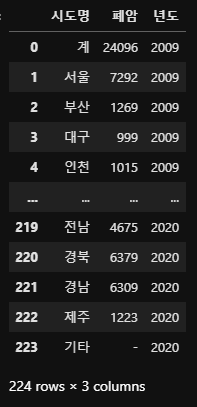
  
### ■ 전처리 과정 설명
---
> 약어 설명
> * pd : pandas
> * DF : 데이터프레임
  
> 자료 리뷰
> * 자료 읽어오기 : `pd.read_csv("FileName", encoding='cp949')`
> * 헤드값 확인 : `DF.head(n)`
  
> 자료 전처리 사용 코드
> * (1) 행렬 반전 : `DF.transpose()`
> * (2) 칼럼명 확인 : `DF.columns`
> * (3) 특정 행을 리스트로 복사 : `DF[DF.index == "column"].value.tolist()`
> * (4) 칼럼명 변경 : `DF.columns = "NewColumnNameList"`
> * (5) 불필요 행 제거 : `DF.drop(index = "IndexName", inplace=True)`
> * (6) 기존 인덱스명을 새로운 column에 추가 : `DF["NewColumnName] = cancer.index.tolist()`
> * (7) 인덱스를 ascending 숫자로 변경 : `DF.index = [i for i in range(len(DF.index))]`
> * (8) 불필요한 칼럼 삭제 : `DF = DF[[NeedColumne1, ... NeedColumnN]]`

In [30]:
import pandas as pd
import numpy as np

# 자료 리뷰
df_1 = pd.read_csv('시도별_전체_중증_암_등록환자의_암유형별_등록인원_현황_20221118165941.csv', encoding='cp949') # 암 자료 raw
df_1.head(5)

,암유형별(1),2009,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,...,2020.9,2020.10,2020.11,2020.12,2020.13,2020.14,2020.15,2020.16,2020.17,2020.18
0,암유형별(1),계,서울,부산,대구,인천,광주,대전,울산,경기,...,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타
1,계,763983,232751,45414,34020,33795,18165,22397,14134,159981,...,612779,74805,76359,104947,94698,105995,137238,155400,28882,-
2,폐암,24096,7292,1269,999,1015,511,651,424,5040,...,25035,3480,3289,4785,4174,4675,6379,6309,1223,-
3,위암,127767,35321,8309,5834,5471,2577,4133,2658,24913,...,68755,10124,11688,16505,13601,14473,21830,22687,3365,-
4,간암,29687,8707,1909,1245,1235,658,670,611,6109,...,18286,2865,2234,3036,2901,4257,4816,5593,1106,-


In [31]:
# 데이터 전처리 (1) 행렬 전환

cancer = np.transpose(df_1)
cancer.head(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
암유형별(1),암유형별(1),계,폐암,위암,간암,대장암,유방암,자궁경부암,입술구강암,식도암,...,신장암,신우암,요관암,방광암,뇌암,비호지킨림프종,다발성골수종,백혈병,갑상샘암,기타암
2009,계,763983,24096,127767,29687,95622,90121,31553,10586,4122,...,13519,1317,1131,18750,5515,13299,2087,9719,-,213270
2009.1,서울,232751,7292,35321,8707,29616,27934,8887,3237,1131,...,4410,436,337,5917,1561,4050,677,2785,-,67305


In [32]:
# 데이터 전처리 (2) 칼럼명 정제 & 1행 삭제

## 칼럼명 확인
print("원 칼럼명 : "), print(cancer.columns)

## 1행이 칼럼이 되어야 함. 1행의 값 리스트로 가져오기
list_column_name = cancer[cancer.index == '암유형별(1)'].values.tolist()[0]
list_column_name[0] = '시도명'
print("변경할 칼럼명 : "), print(list_column_name)

# 칼럼명을 바꿔주기 (0,1,2...) -> [암유형]
cancer.columns = list_column_name
print("변경 후 데이터 : "), print(cancer)

## 1행 제거
cancer.drop(index = '암유형별(1)', inplace=True)
cancer

원 칼럼명 : 
RangeIndex(start=0, stop=30, step=1)
변경할 칼럼명 : 
['시도명', '계', '폐암', '위암', '간암', '대장암', '유방암', '자궁경부암', '입술구강암', '식도암', '담낭암', '담도암', '췌장암', '후두암', '소장암', '뼈및관절연골암', '피부암', '중피성연조직암', '난소암', '전립선암', '신장암', '신우암', '요관암', '방광암', '뇌암', '비호지킨림프종', '다발성골수종', '백혈병', '갑상샘암', '기타암']
변경 후 데이터 : 
             시도명       계     폐암      위암     간암    대장암    유방암  자궁경부암  입술구강암  \
암유형별(1)  암유형별(1)       계     폐암      위암     간암    대장암    유방암  자궁경부암  입술구강암   
2009           계  763983  24096  127767  29687  95622  90121  31553  10586   
2009.1        서울  232751   7292   35321   8707  29616  27934   8887   3237   
2009.2        부산   45414   1269    8309   1909   5544   5839   2166    649   
2009.3        대구   34020    999    5834   1245   3895   4154   1363    402   
...          ...     ...    ...     ...    ...    ...    ...    ...    ...   
2020.14       전남  105995   4675   14473   4257  10728   7793   2116   1301   
2020.15       경북  137238   6379   21830   4816  16213  13124   3162   1519   
202

,시도명,계,폐암,위암,간암,대장암,유방암,자궁경부암,입술구강암,식도암,...,신장암,신우암,요관암,방광암,뇌암,비호지킨림프종,다발성골수종,백혈병,갑상샘암,기타암
2009,계,763983,24096,127767,29687,95622,90121,31553,10586,4122,...,13519,1317,1131,18750,5515,13299,2087,9719,-,213270
2009.1,서울,232751,7292,35321,8707,29616,27934,8887,3237,1131,...,4410,436,337,5917,1561,4050,677,2785,-,67305
2009.2,부산,45414,1269,8309,1909,5544,5839,2166,649,271,...,847,85,88,1166,315,738,109,532,-,11430
2009.3,대구,34020,999,5834,1245,3895,4154,1363,402,170,...,550,57,38,737,225,556,86,404,-,10547
2009.4,인천,33795,1015,5471,1235,4338,4655,1717,503,173,...,566,54,49,839,272,660,90,501,-,8467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020.14,전남,105995,4675,14473,4257,10728,7793,2116,1301,756,...,1899,198,210,2408,459,24025,1569,361,1043,22418
2020.15,경북,137238,6379,21830,4816,16213,13124,3162,1519,823,...,2768,273,351,2930,626,23308,2073,476,1369,28427
2020.16,경남,155400,6309,22687,5593,16210,15572,3495,1790,1002,...,3170,302,333,3476,807,29823,2276,470,1602,33485
2020.17,제주,28882,1223,3365,1106,3255,2864,766,448,183,...,613,58,47,631,171,5010,422,104,381,6536


In [33]:
# 데이터 전처리 (3) 인덱스 명 정제-> 연도 칼럼으로 넘기기
## (1) 연도 칼럼을 만들고, 연도를 넣기

cancer['연도'] = [ int(i[:4]) for i in  cancer.index.tolist() ]

## (2) 인덱스 명 숫자로 변환

cancer.index = [i for i in range(len(cancer.index))]


In [34]:
# 데이터 전처리 (4) 폐암만 남기고 삭제

cancer_lung = cancer[['시도명', '폐암', '연도']]

# 세종 -> 충남으로 합침
# (+) '계' 부분 삭제
cancer_lung['시도명'].str.replace('세종', '충남')
cancer_lung = cancer_lung.groupby(['시도명', '연도'], as_index=False).sum()
cancer_lung[cancer_lung['시도명'] == '계'] = np.nan
cancer_lung = cancer_lung.dropna(axis=0).copy()

# (+) 

cancer_lung.info()
cancer_lung['폐암'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 223
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     212 non-null    object 
 1   연도      212 non-null    float64
 2   폐암      212 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.6+ KB


array(['621', '911', '1079', '1459', '1675', '1841', '2051', '2245',
       '2457', '2800', '3169', '3480', '5040', '6081', '7158', '9155',
       '10285', '11383', '12637', '14483', '17247', '19960', '22648',
       '25035', '1377', '1852', '2090', '2771', '3103', '3335', '3719',
       '4035', '4632', '5230', '5871', '6309', '1250', '1862', '2183',
       '2913', '3199', '3544', '3788', '4085', '4770', '5271', '5839',
       '6379', '511', '687', '782', '1049', '1146', '1263', '1383',
       '1559', '1777', '2009', '2191', '2419', '5', '7', '-', '16', '10',
       '8', '999', '1274', '1538', '2045', '2253', '2697', '2968', '3457',
       '3895', '4325', '4767', '651', '720', '838', '1074', '1211',
       '1370', '1464', '1661', '1921', '2160', '2386', '2606', '1269',
       '1711', '1988', '2696', '3020', '3269', '3604', '4001', '4647',
       '5280', '5936', '6418', '7292', '5615', '6635', '8415', '9393',
       '10356', '11300', '12334', '14195', '16028', '17872', '19512',
       '

In [35]:
# 데이터 전처리 (5) 데이터 타입 정제
# 연도 -> int형 & 폐암 -> int 형

import math

cancer_lung['연도'] = [ int(math.floor(i)) for i in cancer_lung['연도'].to_list() ]


# 폐암부분의 '-'(환자없음) 를 0으로 전환 후 int형으로 변환
cancer_lung[cancer_lung['폐암'] == '-'] = 0
cancer_lung['폐암'] = [ int(i) for i in cancer_lung['폐암'].to_list() ]

cancer_lung
# df_10['연도'] = [ int(math.floor(i)) for i in df_10['시점'].to_list() ]

,시도명,연도,폐암
0,강원,2009,621
1,강원,2010,911
2,강원,2011,1079
3,강원,2012,1459
4,강원,2013,1675
...,...,...,...
219,충북,2016,2183
220,충북,2017,2518
221,충북,2018,2843
222,충북,2019,3075


## (2) 미세먼지 PM10, PM2.5 (월별/도시별)

### ■ 전처리 전 리뷰
자료 구조적으로는 잘 정제되어있어, 사용함에 큰 불편함이 없어 보인다.  
하지만, 데이터 형식에 대한 정제, 월평균의 연평균화,  
그리고 두 개 자료의 통합이 필요해 손이 많이 간다.   
전체 데이터의 생김새를 확정할 수 없기에, 선 데이터 전처리 후 파일 통합을 진행한다. (시간상으로는 더 오래걸림)  
  
### ■ 전처리 내용  
---
(1) 시점 column을 '월'은 제거하고 '연'만 남기기 + int 형으로 변환  
(2) 데이터 column 에 붙은 별표 제거 + int 형으로 변환  
(3) 시,도 이름을 두 글자로 정제   
(4) PM10과 PM2.5 두 자료의 통합   
(5) 월평균인 자료를 연평균으로 변환   
*부산광역시 PM10 측정데이터 없음 주의*  
  
### ■ 전처리 결과   
---
전처리 완료 데이터프레임 명 : polution_of_air  
전처리 완료 데이터프레임 출력  
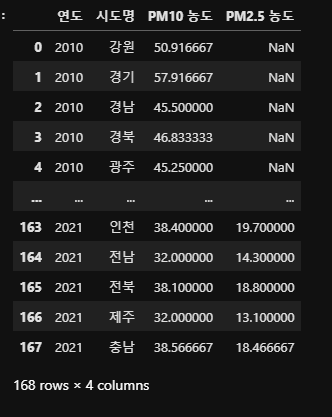  
  
### ■ 전처리 과정 설명  
---
> 약어 설명  
> * pd : pandas  
> * DF : 데이터프레임  
  
> 자료 리뷰  
> * 데이터 헤드 확인 : `DF.head(n)`  
> * 데이터 info 확인 : `DF.info()`  
> * 데이터 index 확인 : `DF.index.unique()`  
> * column 확인 : `DF[columnName].unique()`  
  
> 자료 전처리 사용 코드  
> * (1) value의 일부만 남기기 : float 형을 floor로 내림처리 -> int 부분만 남김 `math.floor(i) for i in DF.tolist()`  
> * (2) value의 특정 문자 대치 : `DF[column].str.replace('str_old', 'str_new')`  
> * (3) 형변환 : `int(DATA)`   
> * (4) 두 데이터프레임 join : `DF = pd.merge(DF1, DF2, left_on=[columns], right_on=[columns], how='method')`   
> * (5) 평균값 그루핑 : `DF.groupby([columns]), as_index=Bool).mean()`  

In [36]:
import pandas as pd
import numpy as np

df_10 = pd.read_csv('미세먼지_PM10__월별_도시별_대기오염도_20221118165018.csv', encoding='cp949')
df_25 = pd.read_csv('미세먼지_PM2.5__월별_도시별_대기오염도_20221118164805.csv', encoding='cp949')

# 자료 리뷰
print("=== DF 헤드 확인 ===")
print("df10 : "), print(df_10.head(5))
print("df25 : "), print(df_25.head(5))
print("\n")

print("=== DF info 확인 ===")
print("df10 : "), print(df_10.info()) # 시점 -> int로 변환 필요 / 데이터 -> int로 변환 필요
print("df25 : "), print(df_25.info()) # 시점 -> int로 변환 필요 / 데이터 -> int로 변환 필요
print("\n")

print("=== DF index 확인 ===")
print("df10 : "), print(df_10.index.unique()) # 0~2199 / CD : 1  * common difference (공차)
print("df25 : "), print(df_25.index.unique()) # 0~1321 / CD : 1
print("\n")

print("=== 시점 column 확인 ===")
print("df10 : "), print(df_10['시점'].unique()) # 문제 발생 : 10월이 .1로 기록된 사항 -> 연단위로 변경할 거라 상관 없음
print("df25 : "), print(df_25['시점'].unique()) # 문제 발생 : 10월이 .1로 기록된 사항 -> 연단위로 변경할 거라 상관 없음
print("\n")

print("=== 구분(1) column 확인 ===")
print("df10 : "), print(df_10['구분(1)'].unique()) # 부산광역시 PM10 측정 데이터 없음
print("df25 : "), print(df_25['구분(1)'].unique())
print("\n")

print("=== 구분(2) column 확인 ===")
print("df10 : "), print(df_10['구분(2)'].unique()) # 부산광역시 PM10 측정 데이터 없음
print("df25 : "), print(df_25['구분(2)'].unique())
print("\n")

print("=== 데이터 column 확인 ===")
print("df10 : "), print(df_10['데이터'].unique()) # 별(*) 삭제 필요 : 별(*)은 신뢰도 낮은 데이터를 나타내나, 연평균으로 작업시 큰 문제 없을 것으로 판단 
print("df25 : "), print(df_25['데이터'].unique()) # 별(*) 삭제 필요 : 별(*)은 신뢰도 낮은 데이터를 나타내나, 연평균으로 작업시 큰 문제 없을 것으로 판단 
print("\n")

# 전체 자료 생김새를 볼 수 없어, 데이터 통합은 뒤로 미루고, 그 외 사항 먼저 진행

=== DF 헤드 확인 ===
df10 : 
        시점  구분(1)  구분(2) 데이터
0  2010.01  서울특별시  서울특별시  59
1  2010.01  대구광역시  대구광역시  56
2  2010.01  인천광역시  인천광역시  64
3  2010.01  광주광역시  광주광역시  46
4  2010.01  대전광역시  대전광역시  48
df25 : 
        시점  구분(1)  구분(2) 데이터
0  2015.01  서울특별시  서울특별시  25
1  2015.01  부산광역시  부산광역시  27
2  2015.01  대구광역시  대구광역시  33
3  2015.01  인천광역시  인천광역시  31
4  2015.01  광주광역시  광주광역시  27


=== DF info 확인 ===
df10 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      2199 non-null   float64
 1   구분(1)   2199 non-null   object 
 2   구분(2)   2199 non-null   object 
 3   데이터     2199 non-null   object 
dtypes: float64(1), object(3)
memory usage: 68.8+ KB
None
df25 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      132

In [37]:
# 전처리 시작 (1-1) 시점 column 월 제거, 연만 유지 (1-2) int형으로 변환
# 연.월의 float 형태 데이터임을 확인했고, 이에 맞게 MATH 모듈의 floor 함수 사용

import math

df_10['연도'] = [ int(math.floor(i)) for i in df_10['시점'].to_list() ]
df_25['연도'] = [ int(math.floor(i)) for i in df_25['시점'].to_list() ]


In [38]:
# 전처리 (2-1) 데이터 column에서 *을 떼고 (2-2) int형으로 변환
# replace로 * 제거, int()로 형변환

df_10['PM10 농도'] = [ int( i.replace('*','',2)) for i in df_10['데이터'] ]
df_25['PM2.5 농도'] = [ int( i.replace('*','',2)) for i in df_25['데이터'] ]


In [39]:
# 전처리 (3) 시, 도 이름을 두 글자로 정제

list_city_old = ['특별시', '광역시', '특별자치도', '세종특별자치시', '전라북도', '전라남도', '충청북도', '충청남도', '경상북도', '경상남도', '도']
list_city_new = ['', '', '', '충남', '전북', '전남', '충북', '충남', '경북', '경남', '']
# df_10['시도명'] = df_10['구분(1)'].str.replace( list_city_old[i], list_city_new[i]) for i in range(len(list_city_old))

df_10['시도명'] = df_10['구분(1)'].str.replace('특별시','').str.replace('광역시','').str.replace('특별자치도','').str.replace('세종특별자치시','충남').str.replace('전라북도','전북').str.replace('전라남도','전남').str.replace('충청북도','충북').str.replace('충청남도','충남').str.replace('경상북도','경북').str.replace('경상남도','경남').str.replace('도','')
df_25['시도명'] = df_25['구분(1)'].str.replace('특별시','').str.replace('광역시','').str.replace('특별자치도','').str.replace('세종특별자치시','충남').str.replace('전라북도','전북').str.replace('전라남도','전남').str.replace('충청북도','충북').str.replace('충청남도','충남').str.replace('경상북도','경북').str.replace('경상남도','경남').str.replace('도','')

df_10 = df_10[['연도','시도명','PM10 농도']]
df_25 = df_25[['연도','시도명','PM2.5 농도']]

In [40]:
# 전처리 (4) PM10, PM2.5 통합
# left-outer-join 사용

df_join = pd.merge(df_10, df_25, left_on = ['연도', '시도명'], right_on = ['연도', '시도명'], how='left')
df_join

,연도,시도명,PM10 농도,PM2.5 농도
0,2010,서울,59,NaN
1,2010,대구,56,NaN
2,2010,인천,64,NaN
3,2010,광주,46,NaN
4,2010,대전,48,NaN
...,...,...,...,...
16987,2021,제주,24,13.0
16988,2021,제주,24,8.0
16989,2021,제주,24,7.0
16990,2021,제주,24,8.0


In [41]:
# 전처리 (5) 월평균 자료를 연평균 자료로 변환
# 그루핑
polution_of_air = df_join.groupby(['연도', '시도명'], as_index=False).mean()
polution_of_air


,연도,시도명,PM10 농도,PM2.5 농도
0,2010,강원,50.916667,NaN
1,2010,경기,57.916667,NaN
2,2010,경남,45.500000,NaN
3,2010,경북,46.833333,NaN
4,2010,광주,45.250000,NaN
...,...,...,...,...
175,2021,전남,32.000000,14.30
176,2021,전북,38.100000,18.80
177,2021,제주,32.000000,13.10
178,2021,충남,39.700000,18.55


## (3) 인구 (월별/시도별 -> 연별/시도별)

### ■ 전처리 전 리뷰  
자료 구조적으로도 잘 정제되어있고, 데이터 또한 준수하다.    
데이터타입에 대한 정제와 연도 X 시군구별 그루핑을 위주로 진행하며,  
다른 데이터들과 맞추기 위해 시군구명의 정제 또한 진행한다.  
  
### ■ 전처리 내용  
---
(1) 총인구수 (명) column "-" 데이터를 NA 처리 & 데이터타입 정제  
(2) 행정구역 column value 값들 정제  
(3) 연도 X 시군구별 그루핑  
  
### ■ 전처리 결과  
---
전처리 완료 데이터프레임 명 : population  
전처리 완료 데이터프레임 출력  
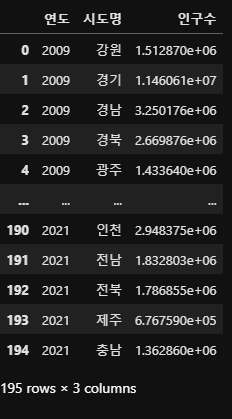
  
### ■ 전처리 과정 설명  
---
> 약어 설명  
> * pd : pandas  
> * DF : 데이터프레임  
  
> 자료 리뷰  
> * 데이터 sample 확인 : `DF.sample(n)`  
> * 데이터 info 확인 : `DF.info()`  
> * 데이터 index 확인 : `DF.index.unique()`  
> * column 확인 : `DF[columnName].unique()`  
    
> 자료 전처리 사용 코드  
> * 사용 코드는 미세먼지 부분과 같아 따로 작성하지 아니함

In [42]:
import pandas as pd
import numpy as np

df_population = pd.read_csv('행정구역_시군구_별__성별_인구수_20221118171006.csv', encoding='cp949')

# 자료 리뷰
print("=== DF sample 확인 ===")
print(df_population.sample(5))
print("\n")

print("=== DF info 확인 ===")
print(df_population.info())
print("\n")

print("=== DF index 확인 ===")
print(df_population.index.unique())
print("\n")


print("=== 시점 column 확인 ===")
print(df_population['시점'].unique())
print("\n")

print("=== 행정구역(시군구)별 column 확인===")
print(df_population['행정구역(시군구)별'].unique())
print("\n")

print("=== 총인구수 (명) column 확인 ===")
print(df_population['총인구수 (명)'].unique())
print("\n")

df_population

=== DF sample 확인 ===
       시점 행정구역(시군구)별 총인구수 (명)
77   2013        강원도  1542263
217  2021       전라남도  1832803
130  2016       충청남도  2096727
14   2009       경상북도  2669876
99   2014       경상북도  2700794


=== DF info 확인 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   시점          221 non-null    int64 
 1   행정구역(시군구)별  221 non-null    object
 2   총인구수 (명)    221 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.3+ KB
None


=== DF index 확인 ===
RangeIndex(start=0, stop=221, step=1)


=== 시점 column 확인 ===
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


=== 행정구역(시군구)별 column 확인===
['서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시' '경기도'
 '강원도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주특별자치도']


=== 총인구수 (명) column 확인 ===
['10208302' '3543030' '2489781' '2710579' '1433640' '1484180' '1114866'
 '-' 

,시점,행정구역(시군구)별,총인구수 (명)
0,2009,서울특별시,10208302
1,2009,부산광역시,3543030
2,2009,대구광역시,2489781
3,2009,인천광역시,2710579
4,2009,광주광역시,1433640
...,...,...,...
216,2021,전라북도,1786855
217,2021,전라남도,1832803
218,2021,경상북도,2626609
219,2021,경상남도,3314183


In [43]:
# 전처리 (1-1) 총인구수 (명) '-' 값 drop na 처리, (1-2) 데이터타입 정제

# '-' 값 drop na 처리
df_population[df_population['총인구수 (명)'] == '-'] = np.nan
df_population = df_population.dropna(axis=0).copy()

# 데이터타입 정제
df_population['인구수'] = [ int(i) for i in df_population['총인구수 (명)']].copy()
df_population['연도'] = [ int(i) for i in df_population['시점']].copy()


In [44]:
# 전처리 (2) 시도명 정제

df_population['시도명'] = df_population['행정구역(시군구)별'].str.replace('특별시','').str.replace('광역시','').str.replace('특별자치도','').str.replace('세종특별자치시','충남').str.replace('전라북도','전북').str.replace('전라남도','전남').str.replace('충청북도','충북').str.replace('충청남도','충남').str.replace('경상북도','경북').str.replace('경상남도','경남').str.replace('도','').copy()

# 파일로 저장
import pandas as pd

path = 'population1.csv'
df_population.to_csv(path, encoding='cp949')

In [45]:
# 전처리 (3) 연도별 X 시도별 그루핑

df_population = df_population[['연도', '시도명', '인구수']]
population = df_population.groupby(['연도', '시도명'], as_index=False).sum()


In [46]:
population

,연도,시도명,인구수
0,2009,강원,1512870
1,2009,경기,11460610
2,2009,경남,3250176
3,2009,경북,2669876
4,2009,광주,1433640
...,...,...,...
203,2021,전남,1832803
204,2021,전북,1786855
205,2021,제주,676759
206,2021,충남,2491152


## (4) 파일 통합

### ■ 전처리 전 리뷰  
파일들을 분석이 쉽도록 데이터타입, 데이터구조 전처리를 진행하였으며,  
하나로 병합하기 위해 "연도" "시도명" 과 같이 칼럼명을 통일해주었다.  
이제 이 파일들을 병합하는 과정을 진행한다.  
  
### ■ 전처리 내용  
---
(1) 세 개의 파일을 "연도", "시도명" 두 가지 칼럼으로 병합한다.  
(2) 이후 새로운 칼럼 "폐암 환자 비율"을 생성하고, 이곳에 비율정보를 입력한다.  
  
### ■ 전처리 결과  
---
전처리 완료 데이터프레임 명 : 
전처리 완료 데이터프레임 출력  
  
### ■ 전처리 과정 설명  
---
> 약어 설명  
> * pd : pandas  
> * DF : 데이터프레임  
  
> 자료 리뷰  
> * 데이터 info 확인 : `DF.info()`  
> * unique value 확인 : `DF[columnName].unique()`  
    
> 자료 전처리 사용 코드  
> * outer join : `pd.merge(DF1, DF2, left_on = ['mergeColumn' ...], right_on['MergeColumn'..., how='outer')`
> * 비율 계산 칼럼 추가 : `DF[신규column] = df[분자column] / df[분모column]`
> * 이외는 사용 코드는 미세먼지 부분과 같아 따로 작성하지 아니함
> * 파일로 저장 : `DF.to_scv('파일저장 경로명 확장자 포함')`

In [47]:
# 파일 리뷰

print("== 전처리된 데이터 조회 ==")
print(cancer_lung), print(polution_of_air), print(population)
print("\n")

print("== 시도명 unique 비교 ==")
print("폐암환자 : "), print(cancer_lung['시도명'].unique())
print("미세먼지 : "), print(polution_of_air['시도명'].unique())
print("총인구수 : "), print(population['시도명'].unique())
print("\n")

print("== 연도 unique 비교 ==")
print("폐암환자 : "), print(cancer_lung['연도'].unique())
print("미세먼지 : "), print(polution_of_air['연도'].unique())
print("총인구수 : "), print(population['연도'].unique())
print("\n")

print("== 자료별 info ==")
print("폐암환자 : "), print(cancer_lung.info())
print("미세먼지 : "), print(polution_of_air.info())
print("총인구수 : "), print(population.info())
print("\n")

== 전처리된 데이터 조회 ==
    시도명    연도    폐암
0    강원  2009   621
1    강원  2010   911
2    강원  2011  1079
3    강원  2012  1459
4    강원  2013  1675
..   ..   ...   ...
219  충북  2016  2183
220  충북  2017  2518
221  충북  2018  2843
222  충북  2019  3075
223  충북  2020  3289

[212 rows x 3 columns]
       연도 시도명    PM10 농도  PM2.5 농도
0    2010  강원  50.916667       NaN
1    2010  경기  57.916667       NaN
2    2010  경남  45.500000       NaN
3    2010  경북  46.833333       NaN
4    2010  광주  45.250000       NaN
..    ...  ..        ...       ...
175  2021  전남  32.000000     14.30
176  2021  전북  38.100000     18.80
177  2021  제주  32.000000     13.10
178  2021  충남  39.700000     18.55
179  2021  충북  36.300000     18.30

[180 rows x 4 columns]
       연도 시도명       인구수
0    2009  강원   1512870
1    2009  경기  11460610
2    2009  경남   3250176
3    2009  경북   2669876
4    2009  광주   1433640
..    ...  ..       ...
203  2021  전남   1832803
204  2021  전북   1786855
205  2021  제주    676759
206  2021  충남   2491152
207  2021 

In [48]:
# 파일을 병합 : (1)폐암환자수 + 미세먼지
# '연도', '시도명' 셀을 기준으로
df_join = pd.merge(cancer_lung, polution_of_air, left_on = ['연도', '시도명'], right_on = ['연도', '시도명'], how='outer')

# 파일을 병합 (2)위 df_join + 총인구수
df_join = pd.merge(df_join, population, left_on = ['연도', '시도명'], right_on = ['연도', '시도명'], how='outer')


# 파일 중 불필요 데이터 정제 (시도명 0)
df_join.drop(df_join[df_join['시도명'] == 0].index, inplace=True)
df_join
# df_join.drop(index=df_join[df_join['시도명'].str.contains('0')].index, inplace=True)

,시도명,연도,폐암,PM10 농도,PM2.5 농도,인구수
0,강원,2009,621.0,NaN,NaN,1512870.0
1,강원,2010,911.0,50.916667,NaN,1529818.0
2,강원,2011,1079.0,49.333333,NaN,1536448.0
3,강원,2012,1459.0,46.666667,NaN,1538630.0
4,강원,2013,1675.0,50.500000,NaN,1542263.0
...,...,...,...,...,...,...
223,전북,2021,NaN,38.100000,18.80,1786855.0
224,제주,2021,NaN,32.000000,13.10,676759.0
225,충남,2021,NaN,39.700000,18.55,2491152.0
226,충북,2021,NaN,36.300000,18.30,1597427.0


In [49]:
# 인구수 대비 폐암 환자 비율 기재

df_join['폐암환자 비율'] = df_join['폐암'] / df_join['인구수']
df_join.columns = ['시도명', '연도', 'PM10 농도', 'PM2.5 농도', '폐암', '인구수', '폐암환자 비율']
df_join

,시도명,연도,PM10 농도,PM2.5 농도,폐암,인구수,폐암환자 비율
0,강원,2009,621.0,NaN,NaN,1512870.0,0.000410
1,강원,2010,911.0,50.916667,NaN,1529818.0,0.000595
2,강원,2011,1079.0,49.333333,NaN,1536448.0,0.000702
3,강원,2012,1459.0,46.666667,NaN,1538630.0,0.000948
4,강원,2013,1675.0,50.500000,NaN,1542263.0,0.001086
...,...,...,...,...,...,...,...
223,전북,2021,NaN,38.100000,18.80,1786855.0,NaN
224,제주,2021,NaN,32.000000,13.10,676759.0,NaN
225,충남,2021,NaN,39.700000,18.55,2491152.0,NaN
226,충북,2021,NaN,36.300000,18.30,1597427.0,NaN


In [50]:
# 파일로 저장
import pandas as pd

path = 'complt_data_proc.csv'
df_join.to_csv(path, encoding='cp949')




In [51]:
# 미세먼지 대비 년도별 폐암환자 비율

df_pm10_year_cancerrate = df_join.pivot_table(index = 'PM10 농도', columns = '연도', values = '폐암환자 비율')
df_pm25_year_cancerrate = df_join.pivot_table(index = 'PM2.5 농도', columns = '연도', values = '폐암환자 비율')

In [52]:
df_join

,시도명,연도,PM10 농도,PM2.5 농도,폐암,인구수,폐암환자 비율
0,강원,2009,621.0,NaN,NaN,1512870.0,0.000410
1,강원,2010,911.0,50.916667,NaN,1529818.0,0.000595
2,강원,2011,1079.0,49.333333,NaN,1536448.0,0.000702
3,강원,2012,1459.0,46.666667,NaN,1538630.0,0.000948
4,강원,2013,1675.0,50.500000,NaN,1542263.0,0.001086
...,...,...,...,...,...,...,...
223,전북,2021,NaN,38.100000,18.80,1786855.0,NaN
224,제주,2021,NaN,32.000000,13.10,676759.0,NaN
225,충남,2021,NaN,39.700000,18.55,2491152.0,NaN
226,충북,2021,NaN,36.300000,18.30,1597427.0,NaN


연도
2009    0.000435
2010    0.000560
2011    0.000653
2012    0.000865
2013    0.000960
2014    0.001049
2015    0.001145
2016    0.001265
2017    0.001454
2018    0.001642
2019    0.001823
2020    0.001990
dtype: float64

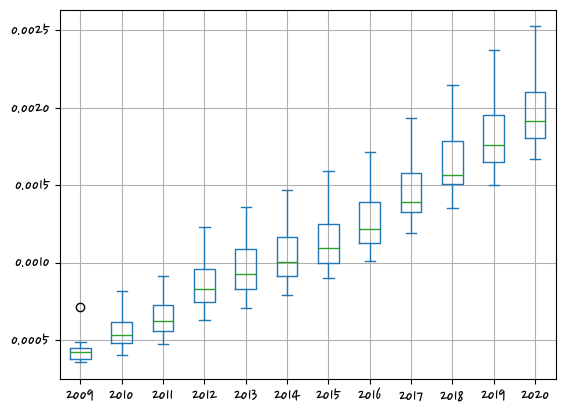

In [23]:
# 미세먼지10

sorted_index = df_pm10_year_cancerrate.mean().sort_values().index
df_pm10_year_cancerrate = df_pm10_year_cancerrate[sorted_index]
df_pm10_year_cancerrate.plot(kind='box', grid  = True)
df_pm10_year_cancerrate.mean()

<AxesSubplot:>

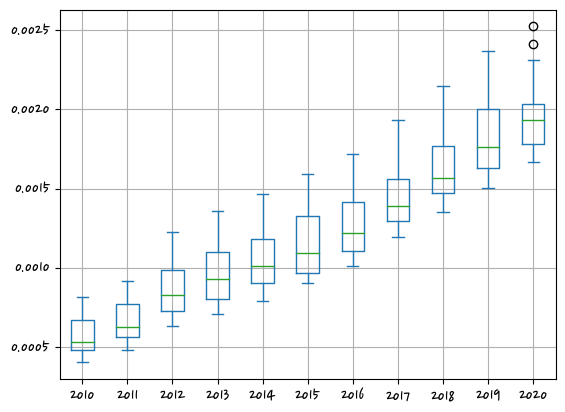

In [24]:
# 미세먼지2.5

sorted_index = df_pm25_year_cancerrate.mean().sort_values().index
df_pm25_year_cancerrate = df_pm25_year_cancerrate[sorted_index]
df_pm25_year_cancerrate.plot(kind='box', grid  = True)

In [25]:
# 미세먼지 대비 시도별 폐암환자 비율

df_pm10_area_cancerrate = df_join.pivot_table(index = 'PM10 농도', columns = '시도명', values = '폐암환자 비율').sort_index()
df_pm25_area_cancerrate = df_join.pivot_table(index = 'PM2.5 농도', columns = '시도명', values = '폐암환자 비율').sort_index()

<AxesSubplot:>

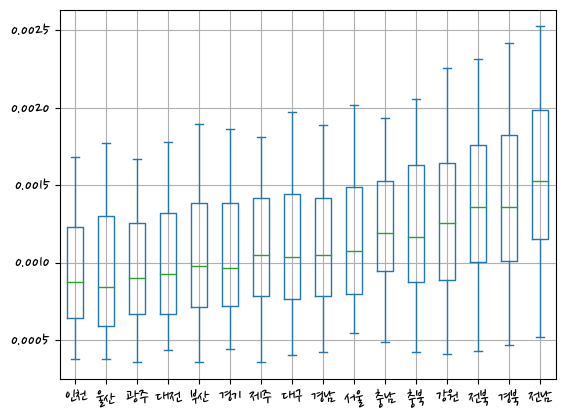

In [26]:
# 미세먼지10

sorted_index = df_pm10_area_cancerrate.mean().sort_values().index
df_pm10_area_cancerrate = df_pm10_area_cancerrate[sorted_index]
df_pm10_area_cancerrate.plot(kind='box', grid  = True)

<AxesSubplot:>

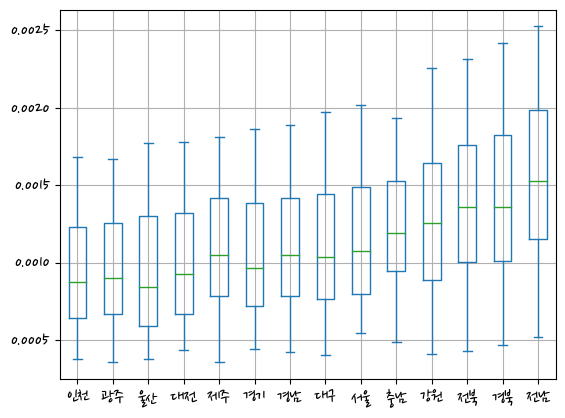

In [27]:
# 미세먼지2.5

sorted_index = df_pm25_area_cancerrate.mean().sort_values().index
df_pm25_area_cancerrate = df_pm10_area_cancerrate[sorted_index]
df_pm25_area_cancerrate.plot(kind='box', grid  = True)

In [55]:
import matplotlib.pyplot as plt

In [56]:
plt.rcParams['font.family'] = 'Malgun Gothic'

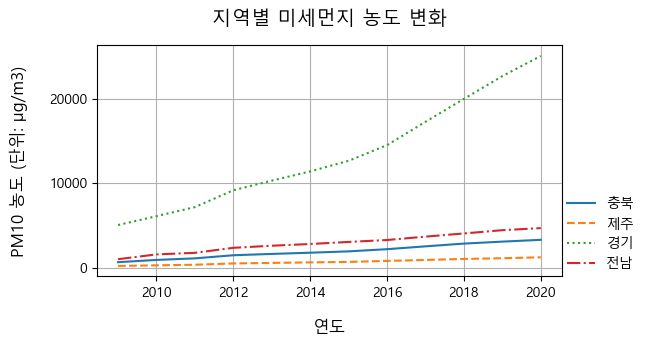

In [58]:
# 그래프 제목
plt.title('지역별 미세먼지 농도 변화', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# 지역별 미먼
plt.plot(df_join.groupby(['시도명']).get_group('충북')['연도'], df_join.groupby(['시도명']).get_group('충북')['PM10 농도'], label='충북', linestyle='solid')
plt.plot(df_join.groupby(['시도명']).get_group('제주')['연도'], df_join.groupby(['시도명']).get_group('제주')['PM10 농도'], label='제주', linestyle='dashed')
plt.plot(df_join.groupby(['시도명']).get_group('경기')['연도'], df_join.groupby(['시도명']).get_group('경기')['PM10 농도'], label='경기', linestyle='dotted')
plt.plot(df_join.groupby(['시도명']).get_group('전남')['연도'], df_join.groupby(['시도명']).get_group('전남')['PM10 농도'], label='전남', linestyle='dashdot')

# 그리드 설정
plt.grid(True)

# 레이블 추가
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('PM10 농도 (단위: μg/m3)', fontsize=12, labelpad=15)

# 숫자크기?! 조정 ㅋㅋㅋㅋ
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 범례 표시
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)
# plt.legend(loc=(1.0, 0.0), ncol=2) # 범례 두줄로

plt.show()


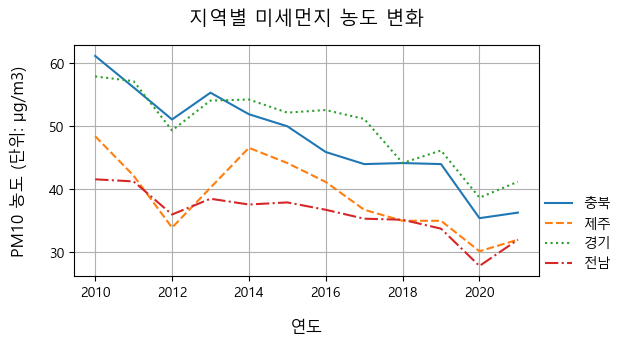

In [6]:
# 그래프 제목
plt.title('지역별 미세먼지 농도 변화', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# 지역별 미먼
plt.plot(data.groupby(['시도명']).get_group('충북')['연도'], data.groupby(['시도명']).get_group('충북')['PM2.5 농도'], label='충북', linestyle='solid')
plt.plot(data.groupby(['시도명']).get_group('제주')['연도'], data.groupby(['시도명']).get_group('제주')['PM2.5 농도'], label='제주', linestyle='dashed')
plt.plot(data.groupby(['시도명']).get_group('경기')['연도'], data.groupby(['시도명']).get_group('경기')['PM2.5 농도'], label='경기', linestyle='dotted')
plt.plot(data.groupby(['시도명']).get_group('전남')['연도'], data.groupby(['시도명']).get_group('전남')['PM2.5 농도'], label='전남', linestyle='dashdot')

# 그리드 설정
plt.grid(True)

# 레이블 추가
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('PM10 농도 (단위: μg/m3)', fontsize=12, labelpad=15)

# 숫자크기?! 조정 ㅋㅋㅋㅋ
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 범례 표시
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)
# plt.legend(loc=(1.0, 0.0), ncol=2) # 범례 두줄로

plt.show()


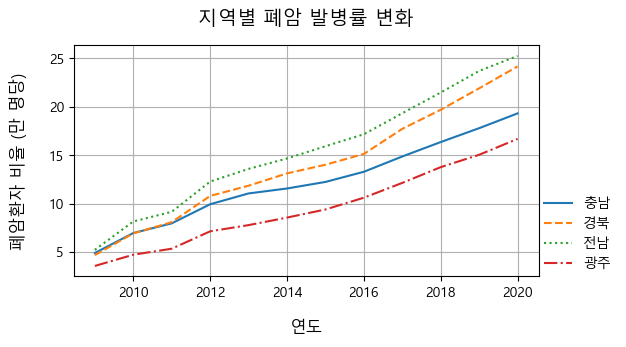

In [7]:
# 그래프 제목
plt.title('지역별 폐암 발병률 변화', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# 지역별 미먼
plt.plot(data.groupby(['시도명']).get_group('충남')['연도'], data.groupby(['시도명']).get_group('충남')['폐암환자 비율']*10000, label='충남', linestyle='solid')
plt.plot(data.groupby(['시도명']).get_group('경북')['연도'], data.groupby(['시도명']).get_group('경북')['폐암환자 비율']*10000, label='경북', linestyle='dashed')
plt.plot(data.groupby(['시도명']).get_group('전남')['연도'], data.groupby(['시도명']).get_group('전남')['폐암환자 비율']*10000, label='전남', linestyle='dotted')
plt.plot(data.groupby(['시도명']).get_group('광주')['연도'], data.groupby(['시도명']).get_group('광주')['폐암환자 비율']*10000, label='광주', linestyle='dashdot')

# 그리드 설정
plt.grid(True)

# 레이블 추가
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('폐암환자 비율 (만 명당)', fontsize=12, labelpad=15)

# 숫자크기?! 조정 ㅋㅋㅋㅋ
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 범례 표시
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)

plt.show()


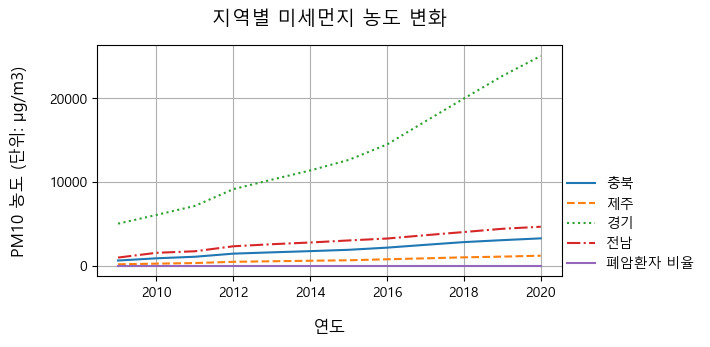

In [8]:
# y축 하나만 했을 때 폐암환자 비율은 보이지도 않음

plt.title('지역별 미세먼지 농도 변화', fontsize=14, pad=15)
plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(data.groupby(['시도명']).get_group('충북')['연도'], data.groupby(['시도명']).get_group('충북')['PM10 농도'], label='충북', linestyle='solid')
plt.plot(data.groupby(['시도명']).get_group('제주')['연도'], data.groupby(['시도명']).get_group('제주')['PM10 농도'], label='제주', linestyle='dashed')
plt.plot(data.groupby(['시도명']).get_group('경기')['연도'], data.groupby(['시도명']).get_group('경기')['PM10 농도'], label='경기', linestyle='dotted')
plt.plot(data.groupby(['시도명']).get_group('전남')['연도'], data.groupby(['시도명']).get_group('전남')['PM10 농도'], label='전남', linestyle='dashdot')
# y축 하나만 했을 때 폐암환자 비율은 보이지도 않음
plt.plot(data.groupby(['시도명']).get_group('서울')['연도'], data.groupby(['시도명']).get_group('서울')['폐암환자 비율'], label='폐암환자 비율')
plt.grid(True)
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('PM10 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)
plt.show()


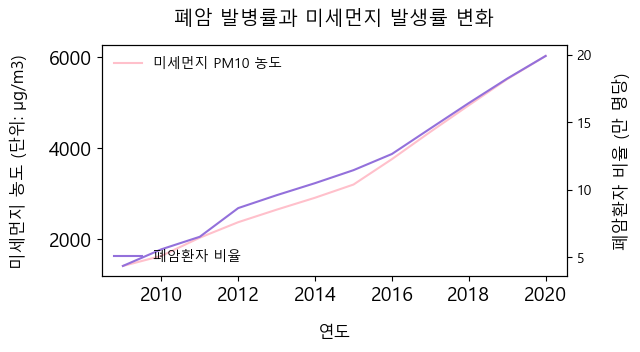

In [9]:
# 이중 축

# 한 그래프에 여러개 그릴거야
fig, ax1 = plt.subplots()

# 그래프 제목
plt.title('폐암 발병률과 미세먼지 발생률 변화', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# x 연도별 y 미세먼지 농도 그래프 먼저 그리고
ax1.plot(data['연도'].unique(), data.groupby(['연도'])['PM10 농도'].mean(), label='미세먼지 PM10 농도', color='pink')
ax1.set_xlabel('연도', fontsize=12, labelpad=15)
ax1.set_ylabel('미세먼지 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
ax1.legend(loc='upper left', fontsize=10, frameon=False)

# ax1과 x축을 공유하는 새로운 Axes 객체 생성
ax2 = ax1.twinx()

# y폐암환자 비율 그래프 추가
ax2.plot(data['연도'].unique(), data.groupby(['연도'])['폐암환자 비율'].mean()*10000, label='폐암환자 비율', color='mediumpurple')
ax2.set_ylabel('폐암환자 비율 (만 명당)', fontsize=12, labelpad=15)
ax2.legend(loc='lower left', fontsize=10, frameon=False)


# 숫자크기 조정
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

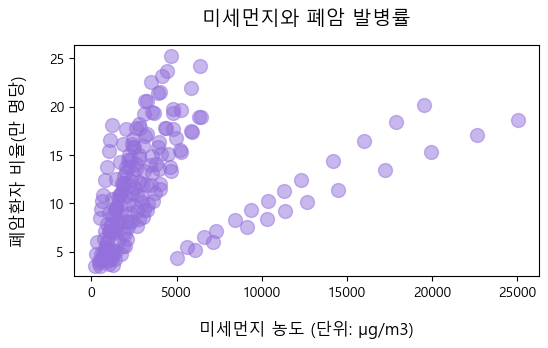

In [10]:
# 색깔 바꾸고 싶어!!!!!!!!!!!!!!

# 그래프 제목
plt.title('미세먼지와 폐암 발병률', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

plt.scatter(data['PM10 농도'], data['폐암환자 비율']*10000, s=100, alpha=0.5, color='mediumpurple')

# 레이블
plt.xlabel('미세먼지 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
plt.ylabel('폐암환자 비율(만 명당)', fontsize=12, labelpad=15)

# 숫자크기?! 조정 ㅋㅋㅋㅋ
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


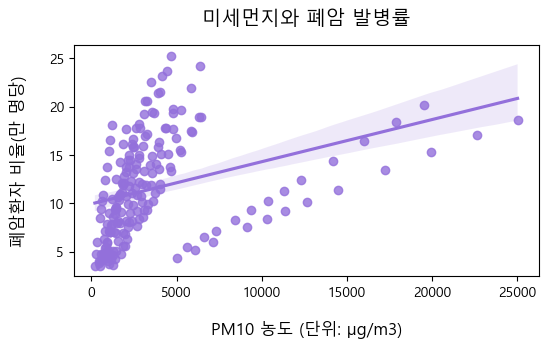

In [11]:

plt.title('미세먼지와 폐암 발병률', fontsize=14, pad=15)

a = sns.regplot(x = data['PM10 농도'], y = data['폐암환자 비율']*10000, data = data, color='mediumpurple')

plt.xlabel('PM10 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
plt.ylabel('폐암환자 비율(만 명당)', fontsize=12, labelpad=15)

# 숫자크기
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()